In [23]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_barplot
from ipynb.fs.full.bootstrapping_utils import single_option_sampling, bootstrapping, confidence_interval
from statistics import mean, pstdev

In [24]:
# get formatted and ready to use dataframe
df = get_df()

In [25]:
# remove undesired and not useful data
remove_value(df,'0','D3_Company_Size')

In [26]:
valid_options_list = list(df['D3_Company_Size'].unique())

In [27]:
valid_answers_list = list(df['D3_Company_Size'])

In [28]:
bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000)

In [29]:
lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['More than 2,000 employees'])

In [41]:
print("Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))

Mean: 44.3155| Lower: 44.26816168254601| Uper: 44.36283831745399


In [32]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]))]
    values += bootstrapped_dict_data[idx]


In [33]:
# build a dataframe from the population metrics
bootstrapped_df = pd.DataFrame()
bootstrapped_df['Company Size'] = indexes
bootstrapped_df['Value'] = values

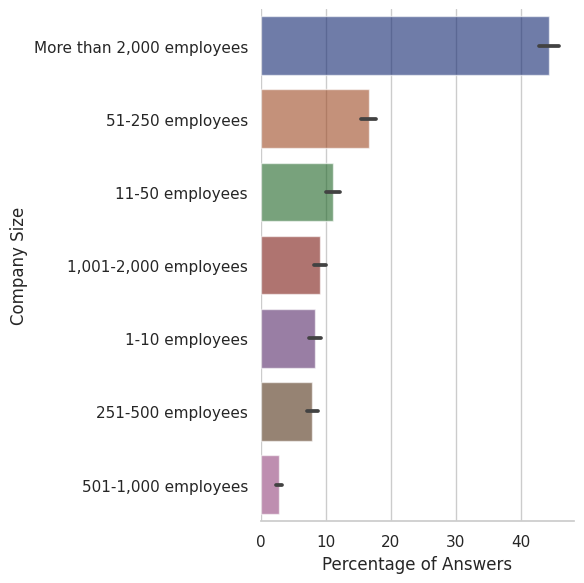

In [37]:
# draw bar plot graphics
d3_plot = sns.catplot(data=bootstrapped_df.sort_values(by=['Value'], ascending = False), 
                      kind="bar", x="Value", y="Company Size", ci="sd", 
                      palette="dark", alpha=.6, height=6)
d3_plot.despine(left=True)
d3_plot.set_axis_labels("Percentage of Answers", "Company Size")